In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
from pylab import *
import glob
import pickle
%matplotlib inline

In [2]:
#reading in an image RGB format
images = glob.glob('camera_cal/calibration*.jpg')
nx = 9 #horizontal inner corners of chess board
ny = 6 #vertical -/- 

objpoints = [] #3D points in real world space (z coordinates being 0)
imgpoints = [] #2D points in image plane

objp = np.zeros((nx*ny ,3) , np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2) #x & y coordinates of the chess corners

#print (objp)

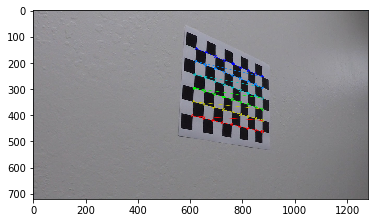

In [3]:
for fname in images:
    #print (fname)
    image = mpimg.imread(fname)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        cv2.drawChessboardCorners(image, (nx, ny), corners, ret)
        plt.imshow(image) #prints the last image 
    

In [4]:
cam_calib_imgpoints_objpoints = open('cam_calib_imgpoints_objpoints.pkl','wb')
pickle.dump(imgpoints, cam_calib_imgpoints_objpoints)
pickle.dump(objpoints, cam_calib_imgpoints_objpoints)
cam_calib_imgpoints_objpoints.close()


In [5]:
#testing the pickel file
file = open('cam_calib_imgpoints_objpoints.pkl', 'rb')
imgpoints1 = pickle.load(file)
objpoints1 = pickle.load(file)

In [6]:
# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints1, imgpoints1):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2:], None, None)
    
    
    return cv2.undistort(img, mtx, dist, None, mtx)

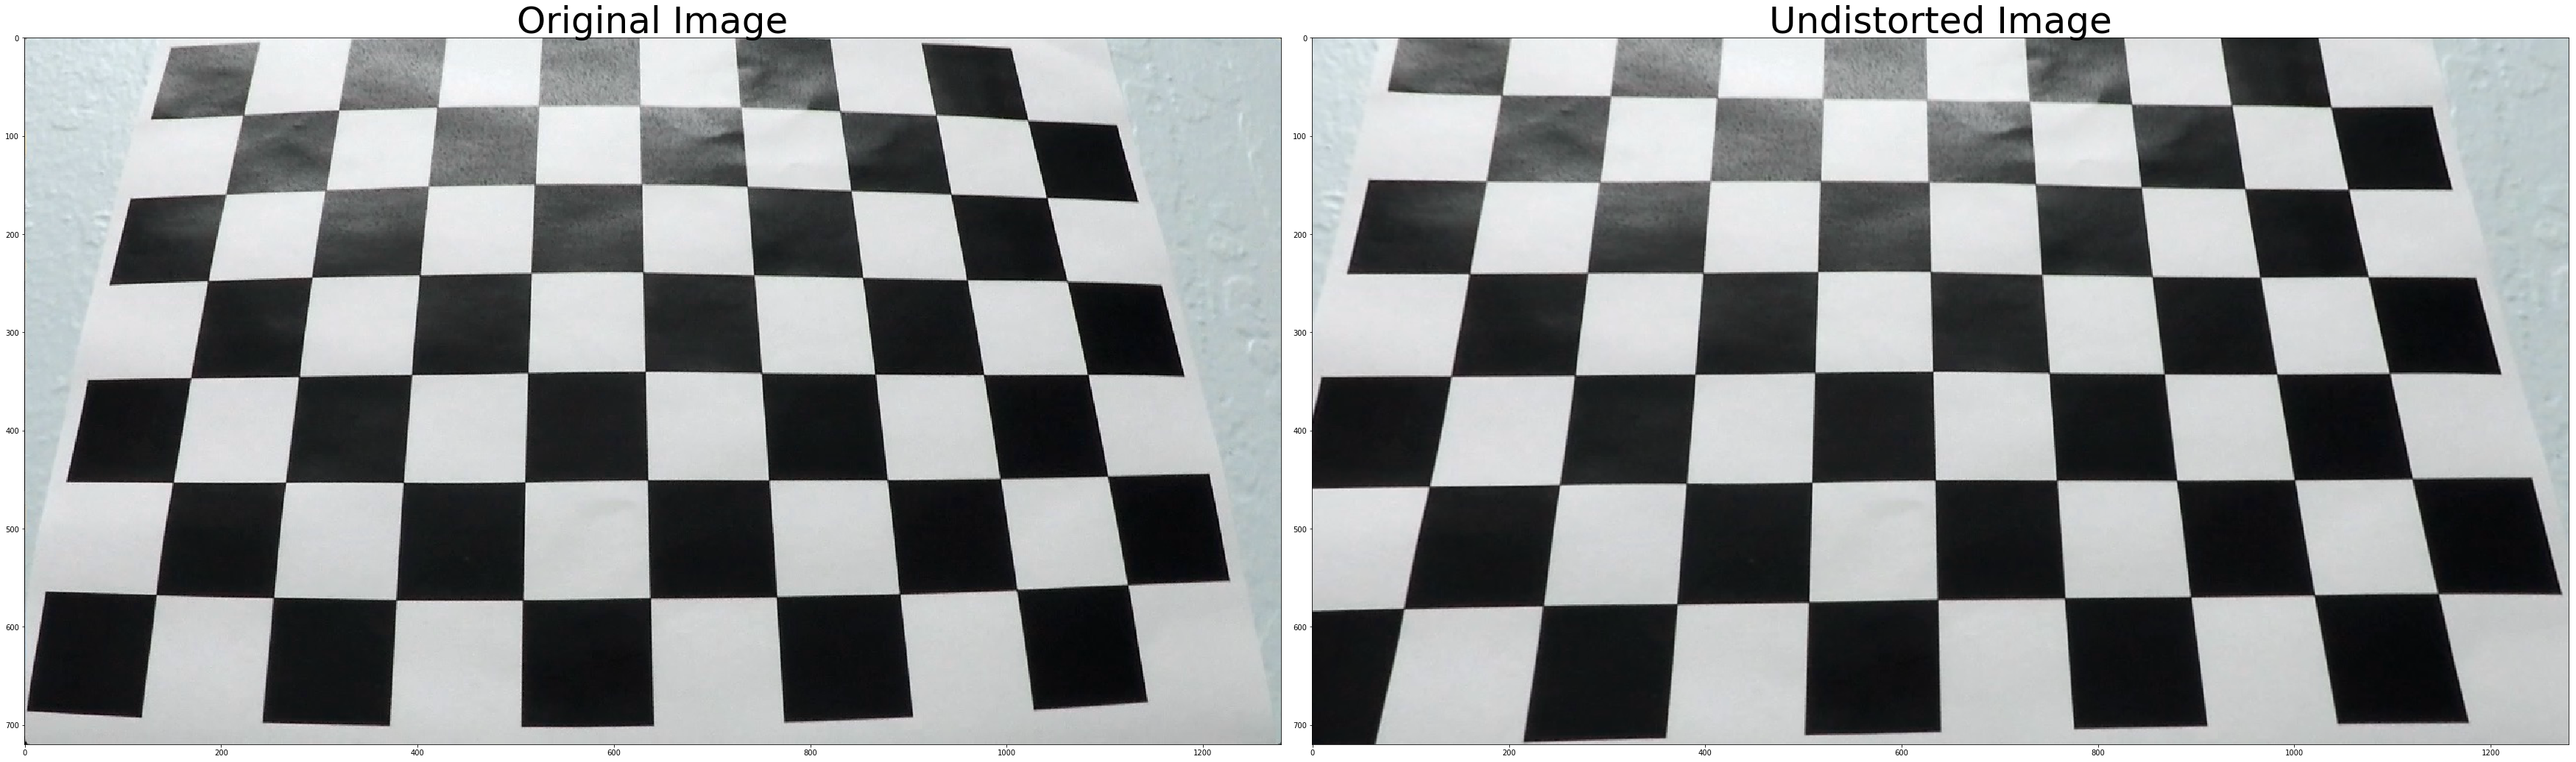

In [7]:
img = cv2.imread('camera_cal/calibration3.jpg')

undistorted = cal_undistort(img, objpoints1, imgpoints1)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(48, 18))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)